# Time Series

In [156]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose


### Vendas em dois anos

In [17]:
PATH_ALUCAR = "../data/alucar.csv"
alucar_df = pd.read_csv(PATH_ALUCAR)

In [18]:
alucar_df.isna().sum(), alucar_df.dtypes

(mes       0
 vendas    0
 dtype: int64,
 mes       object
 vendas     int64
 dtype: object)

In [19]:
alucar_df['mes'] = pd.to_datetime(alucar_df['mes'])

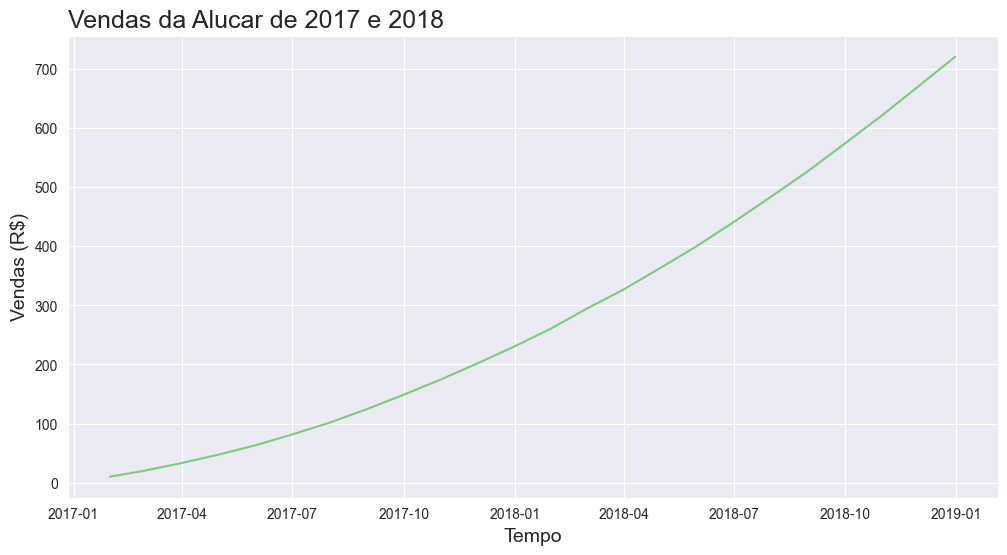

In [25]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar_df)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [36]:
alucar_df['aumento'] = alucar_df['vendas'].diff()
alucar_df['aceleracao'] = alucar_df['aumento'].diff()

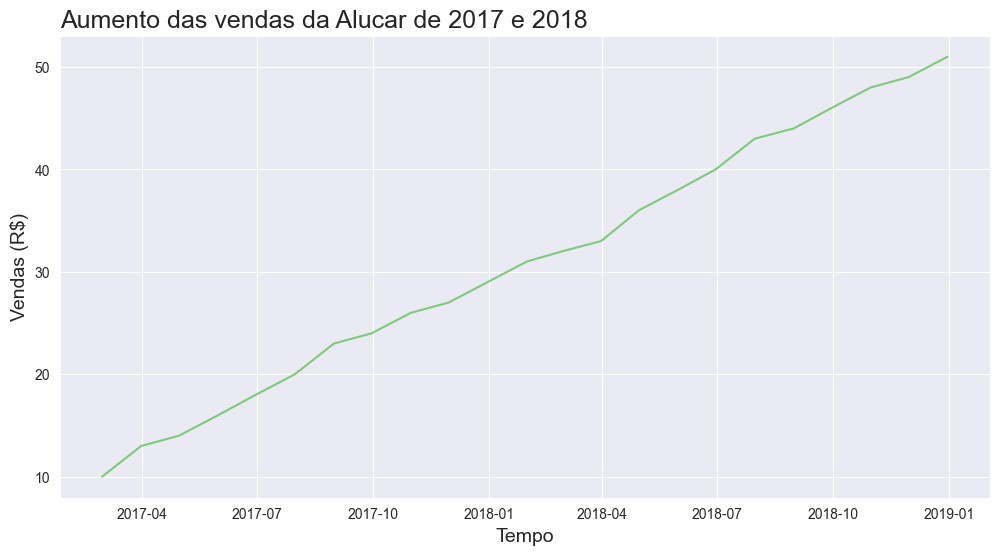

In [31]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar_df)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [32]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

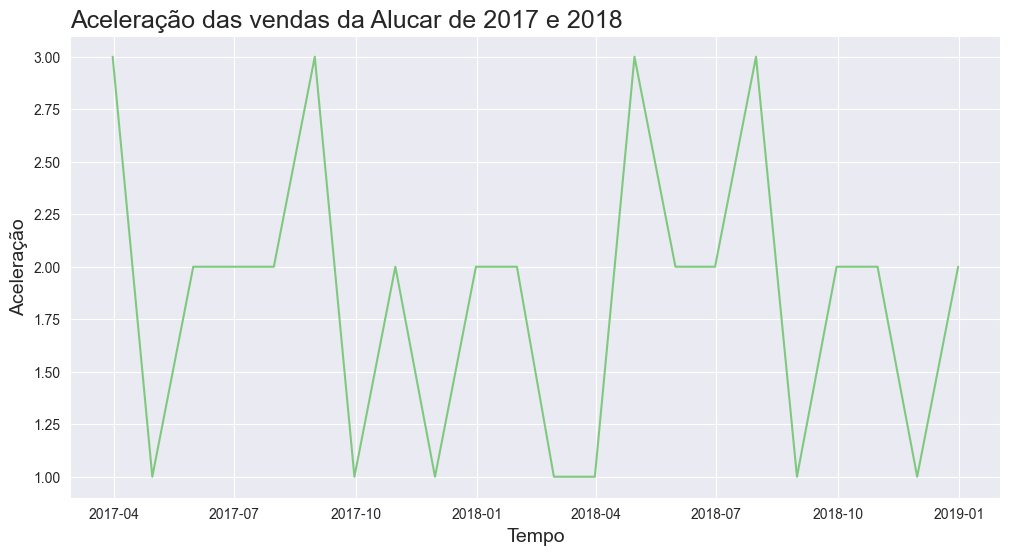

In [38]:

#plotar('Vendas da Alucar de 2017 e 2018', 'Tempo', 'Vendas (R$)', 'mes', 'vendas', alucar_df)
#plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar_df)
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar_df)

<Axes: xlabel='mes', ylabel='aceleracao'>

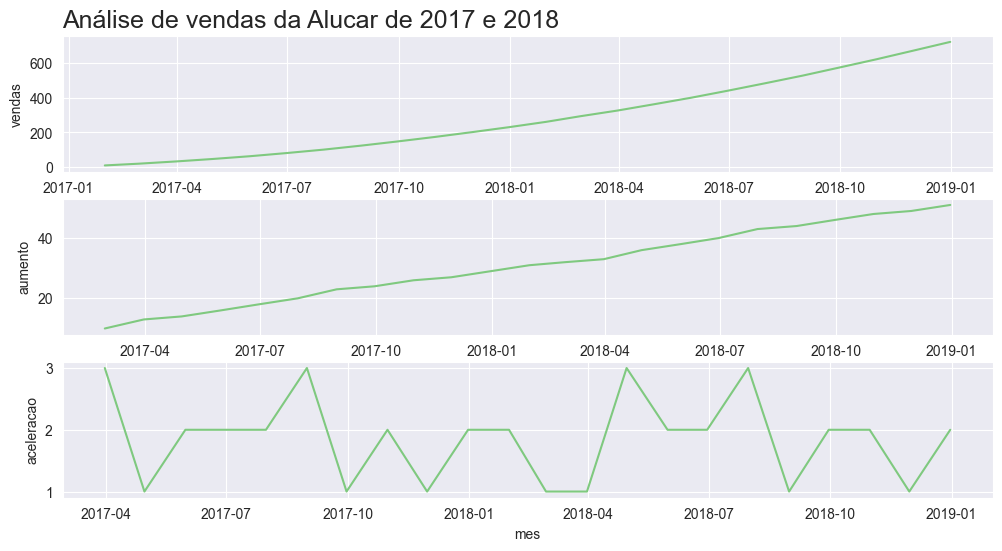

In [39]:
plt.figure(figsize=(12,6))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar_df)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar_df)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar_df)

In [43]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(12,6))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

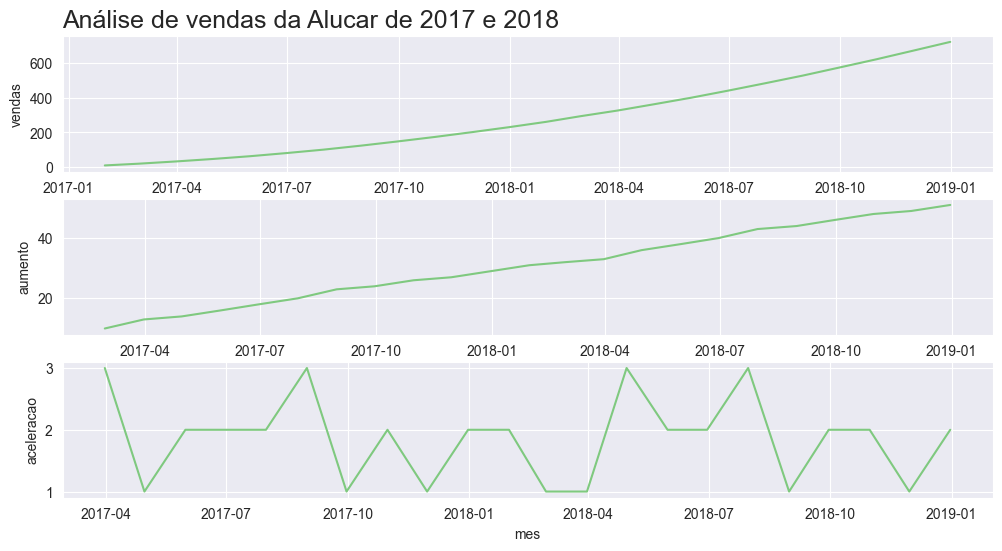

In [44]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar_df, 'Análise de vendas da Alucar de 2017 e 2018')

# Autocorrelação

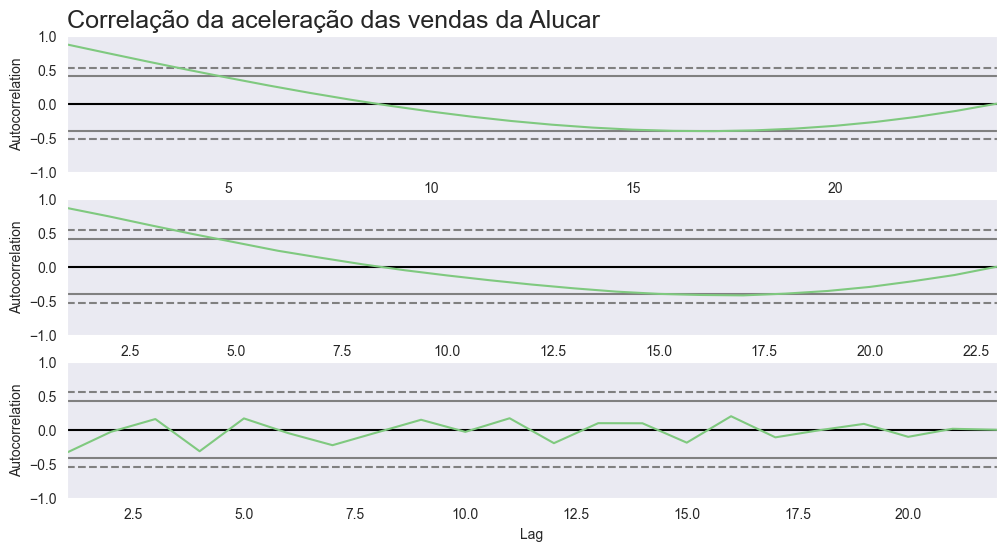

In [47]:

plt.figure(figsize=(12,6))
ax = plt.subplot(3,1,1)
ax.set_title('Correlação das vendas da Alucar', fontsize=18, loc='left')
autocorrelation_plot(alucar_df['vendas'])
plt.subplot(3,1,2)
ax.set_title('Correlação do aumento das vendas da Alucar', fontsize=18, loc='left')
autocorrelation_plot(alucar_df['aumento'][1:])
plt.subplot(3,1,3)
ax.set_title('Correlação da aceleração das vendas da Alucar', fontsize=18, loc='left')
autocorrelation_plot(alucar_df['aceleracao'][2:])
ax = ax


### Assinantes newsletter

In [48]:
PATH_NEWSLETTER = "../data/newsletter_alucar.csv"
newsletter_df = pd.read_csv(PATH_NEWSLETTER)

In [50]:
newsletter_df['mes'] = pd.to_datetime(newsletter_df['mes'])

In [53]:
newsletter_df['aumento'] = newsletter_df['assinantes'].diff()
newsletter_df['aceleracao'] = newsletter_df['aumento'].diff()
newsletter_df

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


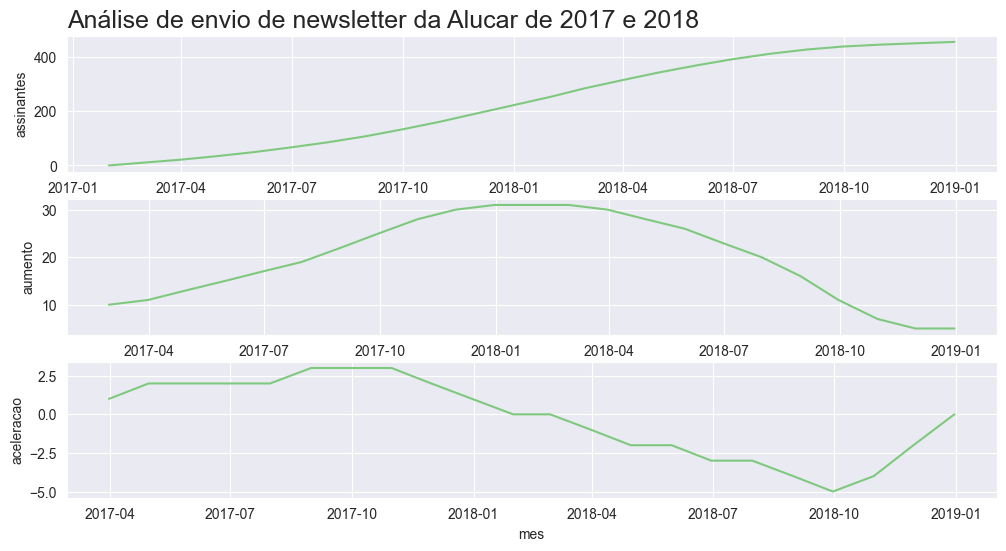

In [54]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', newsletter_df, 'Análise de envio de newsletter da Alucar de 2017 e 2018')

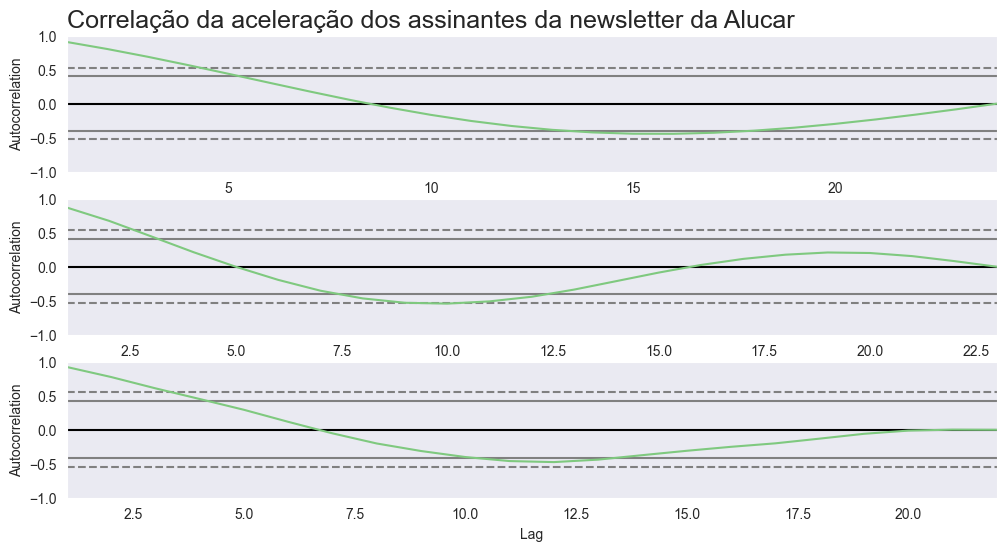

In [55]:
### correlação
plt.figure(figsize=(12,6))
ax = plt.subplot(3,1,1)
ax.set_title('Correlação dos assinantes da newsletter da Alucar', fontsize=18, loc='left')
autocorrelation_plot(newsletter_df['assinantes'])
plt.subplot(3,1,2)
ax.set_title('Correlação do aumento dos assinantes da newsletter da Alucar', fontsize=18, loc='left')
autocorrelation_plot(newsletter_df['aumento'][1:])
plt.subplot(3,1,3)
ax.set_title('Correlação da aceleração dos assinantes da newsletter da Alucar', fontsize=18, loc='left')
autocorrelation_plot(newsletter_df['aceleracao'][2:])
ax = ax

## Chocolura

In [56]:
PATH_CHOCOLURA = '../data/chocolura.csv'
chocolura_df = pd.read_csv(PATH_CHOCOLURA)


In [58]:
chocolura_df['mes'] = pd.to_datetime(chocolura_df['mes'])
chocolura_df['aumento'] = chocolura_df['vendas'].diff()
chocolura_df['aceleracao'] = chocolura_df['aumento'].diff()


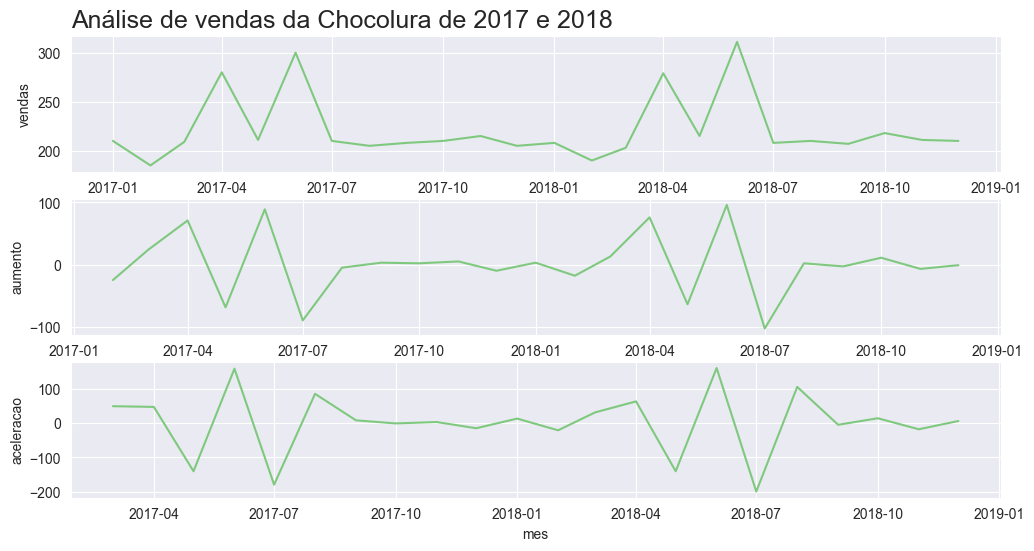

In [60]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura_df, 'Análise de vendas da Chocolura de 2017 e 2018')

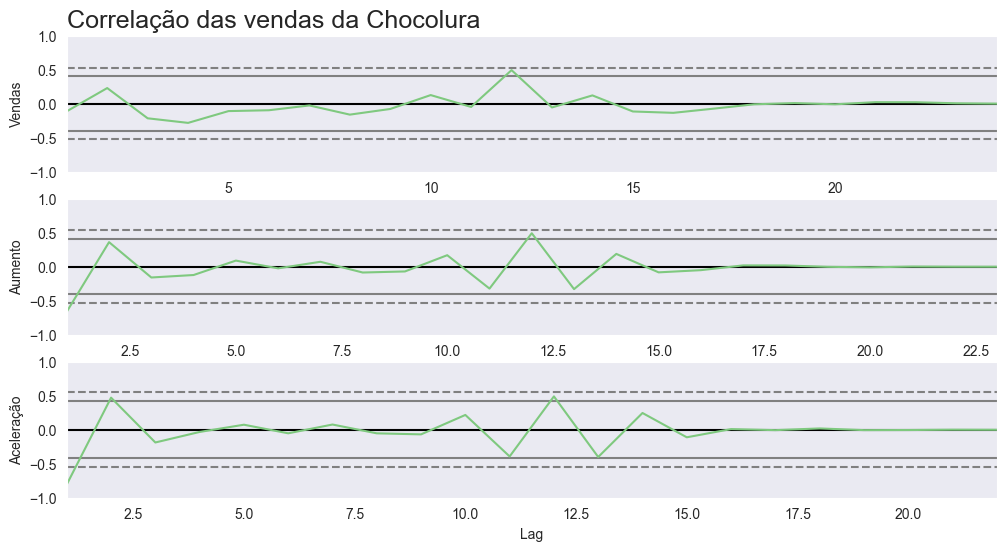

In [133]:
### correlação
plt.figure(figsize=(12,6))
ax = plt.subplot(3,1,1)
ax.set_title('Correlação das vendas da Chocolura', fontsize=18, loc='left')
autocorrelation_plot(chocolura_df['vendas'])
ax.set_ylabel('Vendas')
ax = plt.subplot(3,1,2)
#ax.set_title('Correlação do aumento das vendas da Chocolura', fontsize=18, loc='left')
autocorrelation_plot(chocolura_df['aumento'][1:])
ax.set_ylabel('Aumento')
ax = plt.subplot(3,1,3)
#ax.set_title('Correlação da aceleração das vendas da Chocolura', fontsize=18, loc='left')
autocorrelation_plot(chocolura_df['aceleracao'][2:])
ax.set_ylabel('Aceleração')
ax = ax

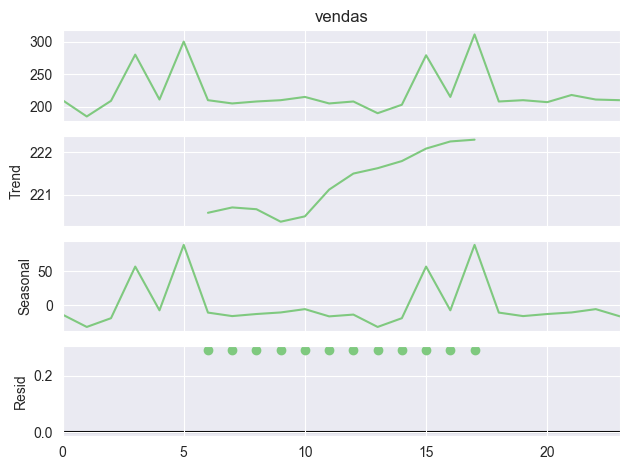

In [171]:
# seasonal_decompose
result = seasonal_decompose(chocolura_df['vendas'], period=12)
_ = result.plot()

### Chocolura vendas diárias

In [108]:
PATH_CHOCOLURA_DIARIO = '../data/vendas_por_dia.csv'
chocolura_diario_df = pd.read_csv(PATH_CHOCOLURA_DIARIO)

In [109]:
chocolura_diario_df['dia'] = pd.to_datetime(chocolura_diario_df['dia'])
chocolura_diario_df['aumento'] = chocolura_diario_df['vendas'].diff()
chocolura_diario_df['aceleracao'] = chocolura_diario_df['aumento'].diff()

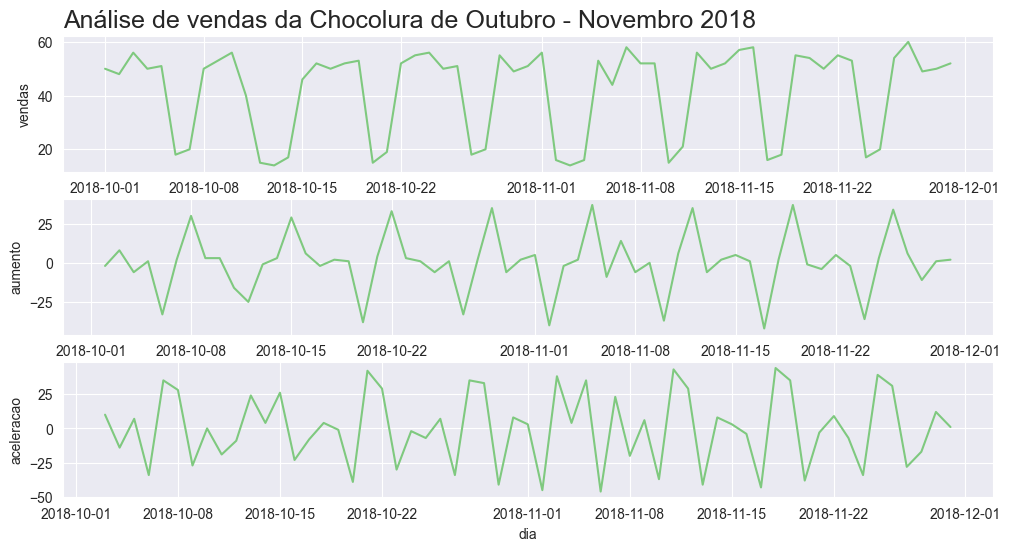

In [110]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', chocolura_diario_df, 'Análise de vendas da Chocolura de Outubro - Novembro 2018')

In [116]:
chocolura_diario_df['dia_da_semana'] = chocolura_diario_df['dia'].dt.day_name()
dias_port = dict(zip(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']))
chocolura_diario_df['dia_da_semana'] = chocolura_diario_df['dia_da_semana'].map(dias_port)


In [121]:
chocolura_diario_df.groupby('dia_da_semana')[['vendas','aumento','aceleracao']].mean().round()#.sort_values(ascending=False)   

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


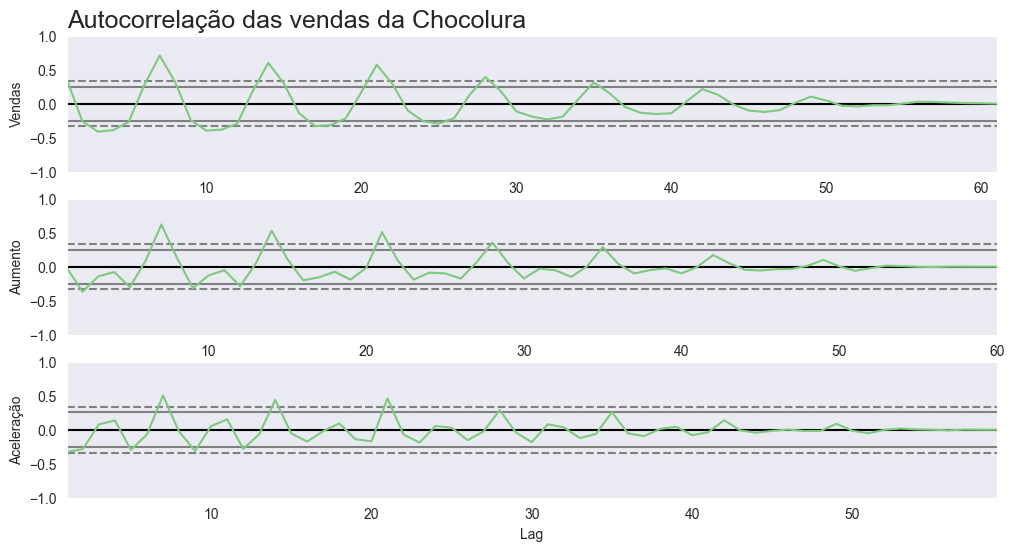

In [130]:
### correlação vendas diarias
plt.figure(figsize=(12,6))
ax = plt.subplot(3,1,1)
ax.set_title('Autocorrelação das vendas da Chocolura', fontsize=18, loc='left')
autocorrelation_plot(chocolura_diario_df['vendas'])
ax.set_ylabel('Vendas')
ax = plt.subplot(3,1,2)
#ax.set_title('Correlação do aumento das vendas da Chocolura', fontsize=18, loc='left')
autocorrelation_plot(chocolura_diario_df['aumento'][1:])
ax.set_ylabel('Aumento')
ax = plt.subplot(3,1,3)
#ax.set_title('Correlação da aceleração das vendas da Chocolura', fontsize=18, loc='left')
autocorrelation_plot(chocolura_diario_df['aceleracao'][2:])
ax.set_ylabel('Aceleração')
ax = ax

In [154]:
result = seasonal_decompose(chocolura_diario_df['vendas'], period=7)

ModuleNotFoundError: No module named 'statsmodels'

## Cafelura

In [134]:
PATH_CAFELURA = '../data/cafelura.csv'
cafelura_df = pd.read_csv(PATH_CAFELURA)

In [153]:
cafelura_df

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0
5,2017-06-30,7380,1710.0,-120.0,820.0
6,2017-07-31,8096,716.0,-994.0,1012.0
7,2017-08-31,12390,4294.0,3578.0,1239.0
8,2017-09-30,11792,-598.0,-4892.0,1474.0
9,2017-10-31,13984,2192.0,2790.0,1748.0


In [135]:
cafelura_df['mes'] = pd.to_datetime(cafelura_df['mes'])
cafelura_df['aumento'] = cafelura_df['vendas'].diff()
cafelura_df['aceleracao'] = cafelura_df['aumento'].diff()


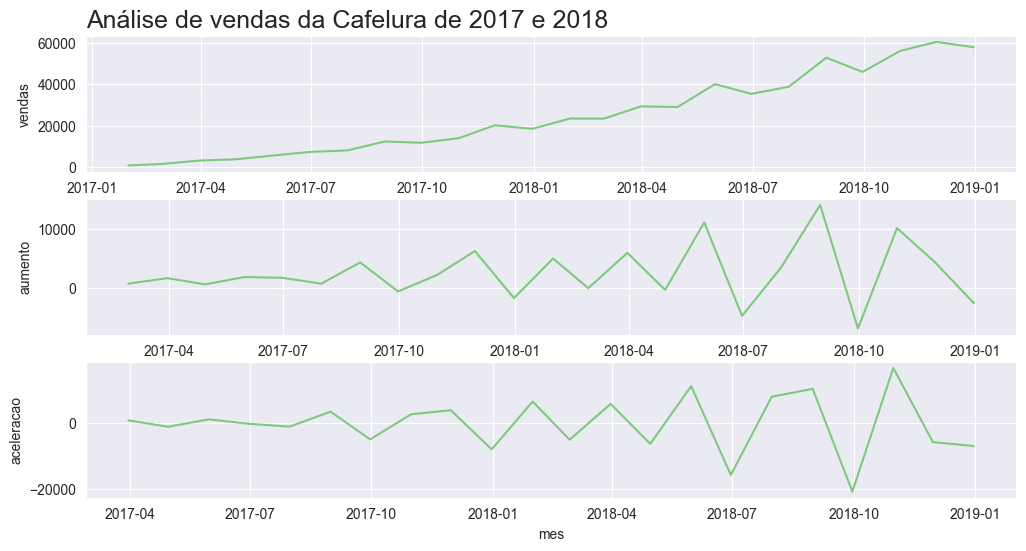

In [136]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', cafelura_df, 'Análise de vendas da Cafelura de 2017 e 2018')

In [150]:
# normalizar dias final de semana
PATH_DIAS_SEMANA = '../data/dias_final_de_semana.csv'
dias_semana_df = pd.read_csv(PATH_DIAS_SEMANA)
#dias_semana_df

In [151]:
cafelura_df['vendas_normalizadas'] = cafelura_df['vendas'] / dias_semana_df['quantidade_de_dias'].values

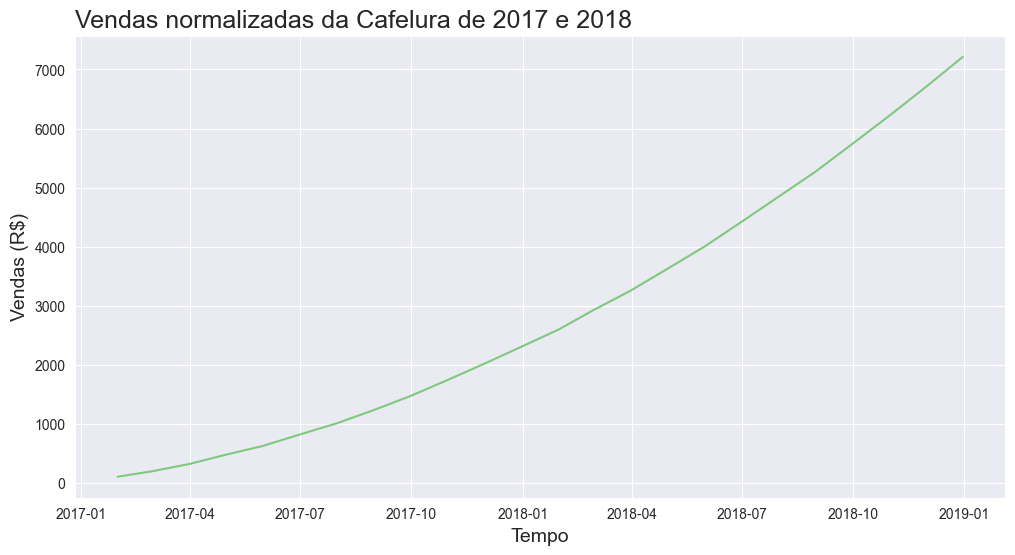

In [152]:
cafelura_df
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas (R$)', 'mes', 'vendas_normalizadas', cafelura_df)
#plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas (R$)', 'mes', 'vendas', cafelura_df)

## Alucel

In [172]:
PATH_ALUCEL = '../data/alucel.csv'
alucel_df = pd.read_csv(PATH_ALUCEL)

In [176]:
alucel_df.isna().sum(), alucel_df.dtypes

(dia       0
 vendas    0
 dtype: int64,
 dia        object
 vendas    float64
 dtype: object)

In [178]:
alucel_df['dia'] = pd.to_datetime(alucel_df['dia'])
alucel_df['aumento'] = alucel_df['vendas'].diff()
alucel_df['aceleracao'] = alucel_df['aumento'].diff()

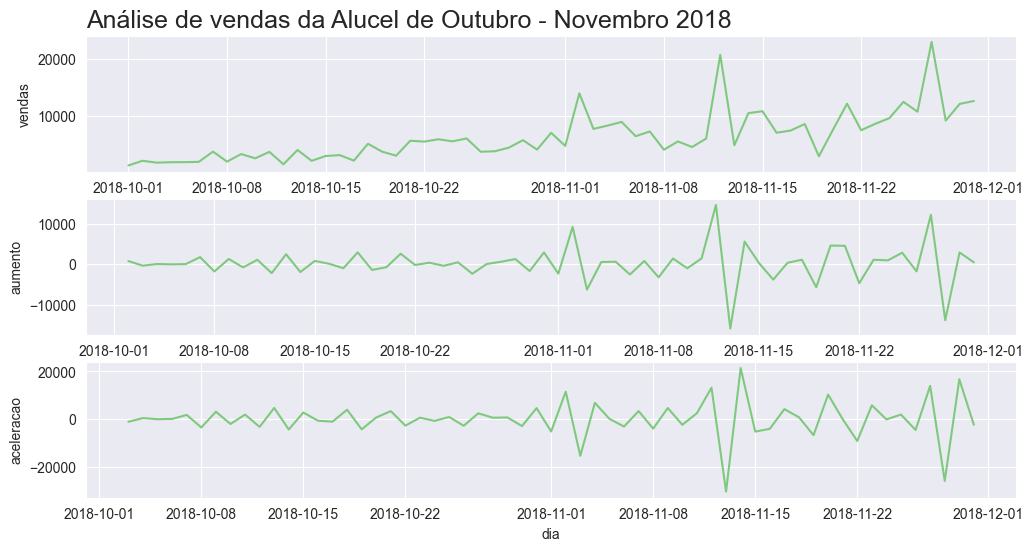

In [179]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel_df, 'Análise de vendas da Alucel de Outubro - Novembro 2018')

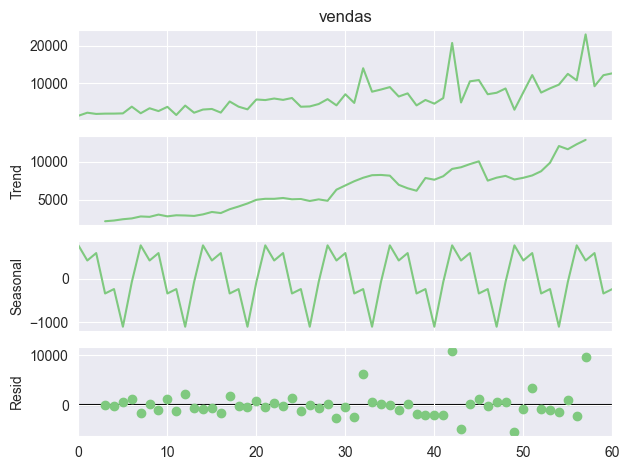

In [183]:
_ = seasonal_decompose(alucel_df['vendas'], period=7).plot()

In [187]:
alucel_df['media_movel'] = alucel_df['vendas'].rolling(7).mean()
alucel_df['media_movel_21'] = alucel_df['vendas'].rolling(21).mean()


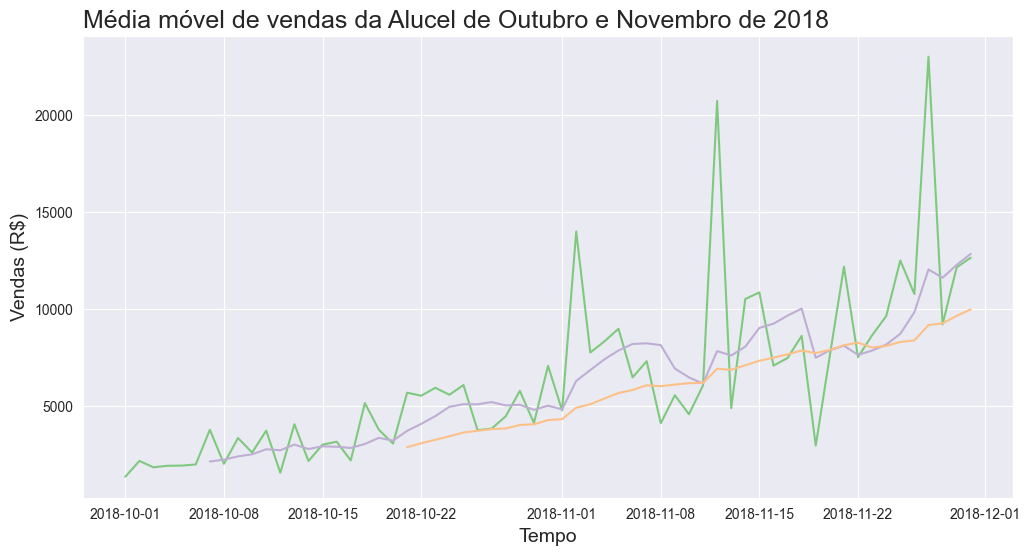

In [188]:
plotar('Vendas da Alucel de Outubro e Novembro de 2018', 'Tempo', 'Vendas (R$)', 'dia', 'vendas', alucel_df)
plotar('Média móvel de vendas da Alucel de Outubro e Novembro de 2018', 'Tempo', 'Vendas (R$)', 'dia', 'media_movel', alucel_df)
plotar('Média móvel de vendas da Alucel de Outubro e Novembro de 2018', 'Tempo', 'Vendas (R$)', 'dia', 'media_movel_21', alucel_df)